In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score
# models
import random
survey = pd.read_csv('/content/drive/MyDrive/dataset/survey.csv')
print(survey.head(5))


             Timestamp  Age  Gender  ... mental_vs_physical obs_consequence comments
0  2014-08-27 11:29:31   37  Female  ...                Yes              No      NaN
1  2014-08-27 11:29:37   44       M  ...         Don't know              No      NaN
2  2014-08-27 11:29:44   32    Male  ...                 No              No      NaN
3  2014-08-27 11:29:46   31    Male  ...                 No             Yes      NaN
4  2014-08-27 11:30:22   31    Male  ...         Don't know              No      NaN

[5 rows x 27 columns]


**Pre**-**Processing**

In [ ]:
#Menghapus beberapa kolom

survey = pd.read_csv('/content/drive/MyDrive/dataset/survey.csv')
survey  = survey.drop(['state','self_employed','family_history', 
                       'care_options', 'leave', 'anonymity', 'coworkers',
                       'supervisor', 'mental_health_interview', 
                       'phys_health_interview', 'seek_help', 
                       'phys_health_consequence', 'mental_vs_physical', 
                       'obs_consequence', 'comments'],axis=1)

survey = pd.DataFrame(survey) 
print(survey.head(5))


             Timestamp  Age  ... wellness_program mental_health_consequence
0  2014-08-27 11:29:31   37  ...               No                        No
1  2014-08-27 11:29:37   44  ...       Don't know                     Maybe
2  2014-08-27 11:29:44   32  ...               No                        No
3  2014-08-27 11:29:46   31  ...               No                       Yes
4  2014-08-27 11:30:22   31  ...       Don't know                        No

[5 rows x 12 columns]


In [ ]:

#Combining missing values in work_interference with "never"
survey['work_interfere'].fillna(value = 'Never', inplace = True)
print(survey.count())



Timestamp                    1259
Age                          1259
Gender                       1259
Country                      1259
treatment                    1259
work_interfere               1259
no_employees                 1259
remote_work                  1259
tech_company                 1259
benefits                     1259
wellness_program             1259
mental_health_consequence    1259
dtype: int64


In [ ]:
##GENDER
survey['Gender'].value_counts()

#male
survey['Gender'] = survey['Gender'].replace(['male','M','m','Make', 'Man', 
                                             'Maile', 'maile', 'Malr', 'Maile', 
                                             'Mail', 'msle', 'Mal',
                                             'Male '], 'Male')
#female
survey['Gender'] = survey['Gender'].replace(['female','F','f','Woman','femail',
                                             'woman', 'Man', 'Maile', 'Malr', 
                                             'Female ', 'Femake' ], 'Female')
#trans
survey['Gender'] = survey['Gender'].replace(['Cis Female', 'Female (trans)',
                                             'Cis Male','Guy (-ish) ^_^',
                                             'Male-ish','non-binary',
                                             'queer/she/they', 
                                             'Trans-female', 'fluid', 'queer',
                                             'cis male', 'All','Trans woman',
                                             'Agender','ostensibly male',
                                             'unsure what that really means',
                                             'Male (CIS)',
                                             'male leaning androgynous',
                                             'cis-female/femme', 'p', 
                                             'Genderqueer', 'Neuter', 
                                             'Enby', 'Androgyne', 'Nah',
                                             'Female (cis)', 'Cis Man', 
                                             'something kinda male?', 
                                             'A little about you' ], 'trans')


In [ ]:
##AGE
print(survey['Age'].unique())

#delete ages less than 0 and greater than 100
survey.drop(survey[survey['Age'] < 0].index, inplace = True) 
survey.drop(survey[survey['Age'] > 100].index, inplace = True)



[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]


In [ ]:
#missing data
total = survey.isnull().sum().sort_values(ascending=False)
percent = (survey.isnull().sum()/survey.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data.head(20)

,Total,Percent
mental_health_consequence,0,0.0
wellness_program,0,0.0
benefits,0,0.0
tech_company,0,0.0
remote_work,0,0.0
no_employees,0,0.0
work_interfere,0,0.0
treatment,0,0.0
Country,0,0.0
Gender,0,0.0


**Encoding Data**

In [ ]:
#Data sebelum di encoding
survey.head(5)

,Timestamp,Age,Gender,Country,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,wellness_program,mental_health_consequence
0,2014-08-27 11:29:31,37,Female,United States,Yes,Often,6-25,No,Yes,Yes,No,No
1,2014-08-27 11:29:37,44,Male,United States,No,Rarely,More than 1000,No,No,Don't know,Don't know,Maybe
2,2014-08-27 11:29:44,32,Male,Canada,No,Rarely,6-25,No,Yes,No,No,No
3,2014-08-27 11:29:46,31,Male,United Kingdom,Yes,Often,26-100,No,Yes,No,No,Yes
4,2014-08-27 11:30:22,31,Male,United States,No,Never,100-500,Yes,Yes,Yes,Don't know,No


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#GENDER
#Female:0, trans:1, Male:2
survey['Gender'] = le.fit_transform(survey['Gender'])

#TREATMENT
#Yes:1, No:0
survey['treatment'] = le.fit_transform(survey['treatment'])

#TECH COMPANY
#Yes:1, No:0
survey['tech_company'] = le.fit_transform(survey['tech_company'])

#BENEFITS
#Yes:2, No:1, Don't Know:0
survey['benefits'] = le.fit_transform(survey['benefits'])

#WELLNESS PROGRAM
#Yes:2, No:1, Don't Know: 0
survey['wellness_program'] = le.fit_transform(survey['wellness_program'])

#MENTAL HEALTH CONSEQUENCES
#Yes:2, No:1, Maybe: 0
survey['mental_health_consequence'] = le.fit_transform(survey['mental_health_consequence'])

#REMOTE WORK
#Yes:2, No:1
survey['remote_work'] = le.fit_transform(survey['remote_work'])

#WORK INTERFERE
#Often:1, Rare:2, Sometimes:3, Never:0
survey['work_interfere'] = le.fit_transform(survey['work_interfere'])

survey.head(5)



,Timestamp,Age,Gender,Country,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,wellness_program,mental_health_consequence
0,2014-08-27 11:29:31,37,0,United States,1,1,6-25,0,1,2,1,1
1,2014-08-27 11:29:37,44,1,United States,0,2,More than 1000,0,0,0,0,0
2,2014-08-27 11:29:44,32,1,Canada,0,2,6-25,0,1,1,1,1
3,2014-08-27 11:29:46,31,1,United Kingdom,1,1,26-100,0,1,1,1,2
4,2014-08-27 11:30:22,31,1,United States,0,0,100-500,1,1,2,0,1


**Model**

In [ ]:
#split the training and test data
from sklearn.model_selection import train_test_split

x = survey.drop(['Timestamp','Age', 'Country', 'treatment', 'no_employees'],
                axis=1)
y = survey["treatment"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,
                                                    random_state = 1)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={'max_depth' : np.arange(1,30),'criterion':('gini','entropy')}
treee = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3)
treee.fit(x_train, y_train)
treee.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [ ]:
treee.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

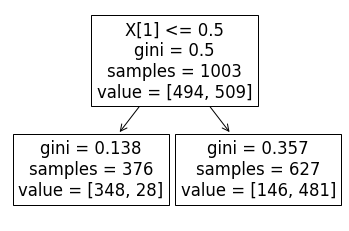

In [ ]:
#default Decision tree hyperparameters
dt = DecisionTreeClassifier(max_depth=1, criterion='gini')
dt.fit(x_train, y_train)
y_pred =dt.predict(x_test)
tree.plot_tree(dt);
fig.savefig('imagename.svg')

Classification Report
Accuracy: 0.8446215139442231
Precision: 0.7814569536423841
Recall: 0.9516129032258065
F1_Score: 0.8581818181818183


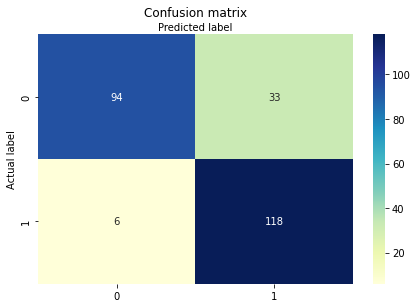

In [ ]:
#confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, 
            cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("Classification Report")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1_Score:",metrics.f1_score(y_test, y_pred))

In [ ]:
#Menghitung akurasi dengan Cross Validation
print('Cross-validated AUC tree:', cross_val_score(dt, x, y, cv=3, 
                                                   scoring='roc_auc').mean())

Cross-validated AUC tree: 0.8290213766207998


In [ ]:
#Menghitung akurasi dengan Cross Validation
print('Cross-validated AUC tree:', cross_val_score(dt, x, y, cv=10, 
                                                   scoring='roc_auc').mean())

Cross-validated AUC tree: 0.8290654601894522


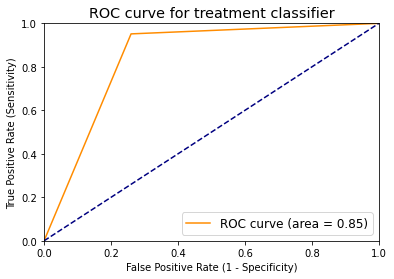

In [ ]:
# ROC for Decision Tree

y_pred_proba =dt.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12         
plt.title('ROC curve for treatment classifier')        
plt.xlabel('False Positive Rate (1 - Specificity)')        
plt.ylabel('True Positive Rate (Sensitivity)')        
plt.legend(loc="lower right")        
plt.show()        
       

**Visualisasi**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


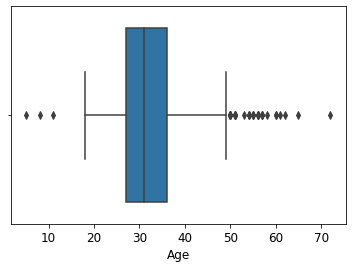

In [ ]:
#Box plot menunjukkan umur karyawan

sns.boxplot(survey['Age'])




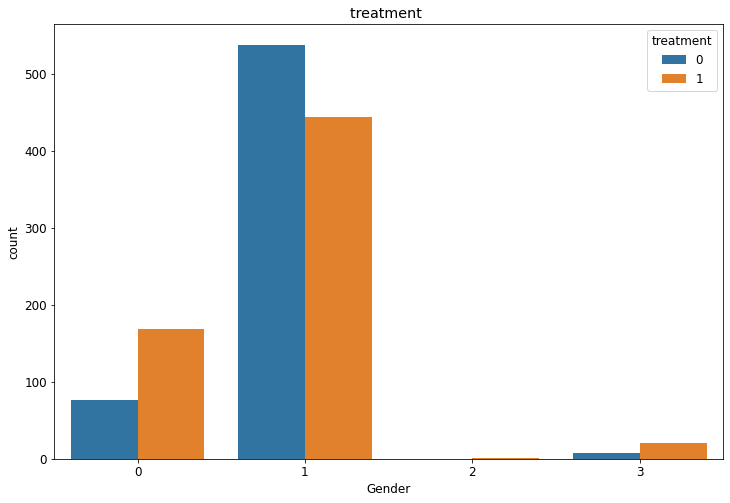

In [ ]:
plt.figure(figsize=(12,8))
plt.title('treatment ')
sns.countplot(x = 'Gender', data = survey, hue = 'treatment')
plt.show()